In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from ast import increment_lineno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df1 = pd.read_csv('/content/drive/MyDrive/Data Set/Dhaka_Apartment_Dataset.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Data Set/bproperty_data.csv')
df2

,Unnamed: 0,Location,Price,Type,No. Beds,No. Baths,Area,Latitude,Longitude,Region,Sub-region
0,0.0,"Sector 10, Uttara, Dhaka",7500000,Apartment,3.0,3.0,1300.0,23.86846,90.39280,Uttara,Sector 10
1,1.0,"Section 11, Mirpur, Dhaka",7280000,Apartment,4.0,4.0,1456.0,23.81223,90.35967,Mirpur,Section 11
2,2.0,"Chowdhuripara, Khilgaon, Dhaka",13000000,Apartment,3.0,3.0,1550.0,23.75349,90.42469,Khilgaon,Chowdhuripara
3,3.0,"Road No 4, Banani, Dhaka",37000000,Apartment,3.0,3.0,2669.0,23.78855,90.40081,Banani,Road No 4
4,4.0,"South Banasree Project, Banasree, Dhaka",3600000,Apartment,2.0,2.0,835.0,23.76354,90.43180,Banasree,South Banasree Project
...,...,...,...,...,...,...,...,...,...,...,...
4699,4747.0,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100.0,23.81223,90.35967,Mirpur,Middle Monipur
4700,4748.0,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100.0,23.81223,90.35967,Mirpur,Middle Monipur
4701,4749.0,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100.0,23.81223,90.35967,Mirpur,Middle Monipur
4702,4750.0,"Middle Monipur, Mirpur, Dhaka",4950000,Apartment,3.0,2.0,1100.0,23.81223,90.35967,Mirpur,Middle Monipur


In [ ]:
df2.columns

Index(['Unnamed: 0', 'Location', 'Price', 'Type', 'No. Beds', 'No. Baths',
       'Area', 'Latitude', 'Longitude', 'Region', 'Sub-region'],
      dtype='object')

In [ ]:
df2.shape

(4704, 11)

In [ ]:
df2.head(1)

,Unnamed: 0,Location,Price,Type,No. Beds,No. Baths,Area,Latitude,Longitude,Region,Sub-region
0,0.0,"Sector 10, Uttara, Dhaka",7500000,Apartment,3.0,3.0,1300.0,23.86846,90.3928,Uttara,Sector 10


In [ ]:
len(df2['Region'].unique())

69

In [ ]:
df2.columns

Index(['Unnamed: 0', 'Location', 'Price', 'Type', 'No. Beds', 'No. Baths',
       'Area', 'Latitude', 'Longitude', 'Region', 'Sub-region'],
      dtype='object')

In [ ]:
df3 = df2[['Price', 'Type', 'No. Beds', 'No. Baths','Area','Region']]
df3.head(2)

,Price,Type,No. Beds,No. Baths,Area,Region
0,7500000,Apartment,3.0,3.0,1300.0,Uttara
1,7280000,Apartment,4.0,4.0,1456.0,Mirpur


In [ ]:
print(df3['Type'].unique())
print(len(df3['Region'].unique()))
print(len(df3['Region'].unique()))

['Apartment' 'Plot' 'Building' 'Duplex']
69
69


In [ ]:
df4 = df3.rename(columns = {
    'No. Beds': 'Bed',
    'No. Baths': 'Bath',
    'Area':'Size',
    'Region':'Location'
})
df4.head(1)

,Price,Type,Bed,Bath,Size,Location
0,7500000,Apartment,3.0,3.0,1300.0,Uttara


In [ ]:
df5 = df4.iloc[:,[0,1,4,2,3,5]]
df5.head(1)

,Price,Type,Size,Bed,Bath,Location
0,7500000,Apartment,1300.0,3.0,3.0,Uttara


In [ ]:
df5.dtypes

,0
Price,int64
Type,object
Size,float64
Bed,float64
Bath,float64
Location,object


In [ ]:
df5.isnull().sum()

,0
Price,0
Type,0
Size,0
Bed,204
Bath,204
Location,0


In [ ]:
df6 = df5.dropna()
df6.head(1)

,Price,Type,Size,Bed,Bath,Location
0,7500000,Apartment,1300.0,3.0,3.0,Uttara


In [ ]:
df6.isnull().sum()

,0
Price,0
Type,0
Size,0
Bed,0
Bath,0
Location,0


In [ ]:
df6.dtypes

,0
Price,int64
Type,object
Size,float64
Bed,float64
Bath,float64
Location,object


In [ ]:
df6["Bed"] = df6["Bed"].astype(int)
df6["Bath"] = df6["Bath"].astype(int)
df6.dtypes

<ipython-input-17-2b78ceaa7cdd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6["Bed"] = df6["Bed"].astype(int)
<ipython-input-17-2b78ceaa7cdd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6["Bath"] = df6["Bath"].astype(int)


,0
Price,int64
Type,object
Size,float64
Bed,int64
Bath,int64
Location,object


In [ ]:
df6['Bed'] = df6['Bed'].astype(int)
df6['Batch'] = df6['Bath'].astype(int)
df6.dtypes

<ipython-input-18-852234a21700>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['Bed'] = df6['Bed'].astype(int)
<ipython-input-18-852234a21700>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['Batch'] = df6['Bath'].astype(int)


,0
Price,int64
Type,object
Size,float64
Bed,int64
Bath,int64
Location,object
Batch,int64


In [ ]:
df6.head(1)

,Price,Type,Size,Bed,Bath,Location,Batch
0,7500000,Apartment,1300.0,3,3,Uttara,3


In [ ]:
df6.columns

Index(['Price', 'Type', 'Size', 'Bed', 'Bath', 'Location', 'Batch'], dtype='object')

In [ ]:
df1.head(1)

,Unnamed: 0,price,size_in_sqf,number_of_bath,number_of_bed,full_location,location_area,purpose_of_listing,type_of_listing,completion_status
0,0,19000000.0,2350.0,4,3,"Block B, Bashundhara R-A, Dhaka",Bashundhara R-A,For Sale,Apartment,Ready


In [ ]:
df1.columns

Index(['Unnamed: 0', 'price', 'size_in_sqf', 'number_of_bath', 'number_of_bed',
       'full_location', 'location_area', 'purpose_of_listing',
       'type_of_listing', 'completion_status'],
      dtype='object')

In [ ]:
df7 = df1[['price','size_in_sqf','number_of_bath','number_of_bed','location_area','type_of_listing']]
df7.head(2)

,price,size_in_sqf,number_of_bath,number_of_bed,location_area,type_of_listing
0,19000000.0,2350.0,4,3,Bashundhara R-A,Apartment
1,33000000.0,2294.0,4,3,Gulshan,Apartment


In [ ]:
df7.shape

(10580, 6)

In [ ]:
df8 = df7.rename(columns = {
    'price':'Price',
    'size_in_sqf':'Size',
    'number_of_bath':'Bath',
    'number_of_bed':'Bed',
    'location_area':'Location',
    'type_of_listing':'Type'
})
df8.head(2)

,Price,Size,Bath,Bed,Location,Type
0,19000000.0,2350.0,4,3,Bashundhara R-A,Apartment
1,33000000.0,2294.0,4,3,Gulshan,Apartment


In [ ]:
df8.dtypes

,0
Price,float64
Size,float64
Bath,int64
Bed,int64
Location,object
Type,object


In [ ]:
print(df6.head(1))
print(df8.head(1))

     Price       Type    Size  Bed  Bath Location  Batch
0  7500000  Apartment  1300.0    3     3   Uttara      3
        Price    Size  Bath  Bed         Location       Type
0  19000000.0  2350.0     4    3  Bashundhara R-A  Apartment


In [ ]:
print(df6.head(1))
print(df9.head(1))

     Price       Type    Size  Bed  Bath Location  Batch
0  7500000  Apartment  1300.0    3     3   Uttara      3


NameError: name 'df9' is not defined

In [ ]:
df6.head(1)

,Price,Type,Size,Bed,Bath,Location,Batch
0,7500000,Apartment,1300.0,3,3,Uttara,3


In [ ]:
df1.head(1)

,Unnamed: 0,price,size_in_sqf,number_of_bath,number_of_bed,full_location,location_area,purpose_of_listing,type_of_listing,completion_status
0,0,19000000.0,2350.0,4,3,"Block B, Bashundhara R-A, Dhaka",Bashundhara R-A,For Sale,Apartment,Ready


In [ ]:
df1.columns

Index(['Unnamed: 0', 'price', 'size_in_sqf', 'number_of_bath', 'number_of_bed',
       'full_location', 'location_area', 'purpose_of_listing',
       'type_of_listing', 'completion_status'],
      dtype='object')

In [ ]:
df7 = df1.rename(columns = {
    'price':'Price',
    'size_in_sqf':'Size',
    'number_of_bath':'Bath',
    'number_of_bed':'Bed',
    'location_area':'Location',
    'type_of_listing':'Type'
})
df7.head(1)

,Unnamed: 0,Price,Size,Bath,Bed,full_location,Location,purpose_of_listing,Type,completion_status
0,0,19000000.0,2350.0,4,3,"Block B, Bashundhara R-A, Dhaka",Bashundhara R-A,For Sale,Apartment,Ready


In [ ]:
df7.columns

Index(['Unnamed: 0', 'Price', 'Size', 'Bath', 'Bed', 'full_location',
       'Location', 'purpose_of_listing', 'Type', 'completion_status'],
      dtype='object')

In [ ]:
df8 = df7.drop(columns=["Unnamed: 0", "full_location",'purpose_of_listing','completion_status'])
print(df6.head(1))
df8.head(1)

     Price       Type    Size  Bed  Bath Location  Batch
0  7500000  Apartment  1300.0    3     3   Uttara      3


,Price,Size,Bath,Bed,Location,Type
0,19000000.0,2350.0,4,3,Bashundhara R-A,Apartment


In [ ]:
print(df6.head(1))
print(df8.head(1))

     Price       Type    Size  Bed  Bath Location  Batch
0  7500000  Apartment  1300.0    3     3   Uttara      3
        Price    Size  Bath  Bed         Location       Type
0  19000000.0  2350.0     4    3  Bashundhara R-A  Apartment


In [ ]:
df8 = df8[["Price", "Type", "Size", "Bed", "Bath", "Location"]]
df8.head(1)

,Price,Type,Size,Bed,Bath,Location
0,19000000.0,Apartment,2350.0,3,4,Bashundhara R-A


In [ ]:
df8.dtypes

,0
Price,float64
Type,object
Size,float64
Bed,int64
Bath,int64
Location,object


In [ ]:
df6.dtypes

,0
Price,int64
Type,object
Size,float64
Bed,int64
Bath,int64
Location,object
Batch,int64


In [ ]:
df8['Price'] = df8['Price'].astype(int)
df8.dtypes

,0
Price,int64
Type,object
Size,float64
Bed,int64
Bath,int64
Location,object


In [ ]:
import pandas as pd
df10 = pd.concat([df6,df8], axis = 0)
df10.head(1)

,Price,Type,Size,Bed,Bath,Location,Batch
0,7500000,Apartment,1300.0,3,3,Uttara,3.0


In [ ]:
print(df6.head(1))
print(df8.head(1))

     Price       Type    Size  Bed  Bath Location  Batch
0  7500000  Apartment  1300.0    3     3   Uttara      3
      Price       Type    Size  Bed  Bath         Location
0  19000000  Apartment  2350.0    3     4  Bashundhara R-A


In [ ]:
df10.head(2)

,Price,Type,Size,Bed,Bath,Location,Batch
0,7500000,Apartment,1300.0,3,3,Uttara,3.0
1,7280000,Apartment,1456.0,4,4,Mirpur,4.0


In [ ]:
df10.shape

(15080, 7)

In [ ]:
df10[df10.Bed >70]

,Price,Type,Size,Bed,Bath,Location,Batch
2687,40000000,Building,21600.0,75,10,Savar,NaN


In [ ]:
df10[df10.Bath > 10]

,Price,Type,Size,Bed,Bath,Location,Batch
1681,70000000,Building,9000.0,18,18,Bashundhara R-A,NaN


In [ ]:
df10.to_csv('Dhaka_Apparantment_Price_CLEAN.csv', index = False)

In [ ]:
from google.colab import files
files.download('Dhaka_Apparantment_Price_CLEAN.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df10.head(2)

,Price,Type,Size,Bed,Bath,Location,Batch
0,7500000,Apartment,1300.0,3,3,Uttara,3.0
1,7280000,Apartment,1456.0,4,4,Mirpur,4.0


In [ ]:
df10['Price_Per_sqf'] = (df10.Price/df10.Size.astype(int))
df10.head(10)

,Price,Type,Size,Bed,Bath,Location,Batch,Price_Per_sqf
0,7500000,Apartment,1300.0,3,3,Uttara,3.0,5769.230769
1,7280000,Apartment,1456.0,4,4,Mirpur,4.0,5000.000000
2,13000000,Apartment,1550.0,3,3,Khilgaon,3.0,8387.096774
3,37000000,Apartment,2669.0,3,3,Banani,3.0,13862.869989
4,3600000,Apartment,835.0,2,2,Banasree,2.0,4311.377246
5,6800000,Apartment,1260.0,3,3,Mirpur,3.0,5396.825397
6,6800000,Apartment,1260.0,3,3,Mirpur,3.0,5396.825397
7,5500000,Apartment,750.0,2,2,Shantinagar,2.0,7333.333333
8,6700000,Apartment,938.0,3,2,Rampura,2.0,7142.857143
9,13500000,Apartment,1455.0,3,3,Tejgaon,3.0,9278.350515


In [ ]:
df10.Type.value_counts()

,count
Type,
Apartment,14871
Building,153
Duplex,55
Plot,1


In [ ]:
df11 = df10[df10.Type == 'Apartment']
df11.Type.value_counts()

,count
Type,
Apartment,14871


In [ ]:
df11.describe()

,Price,Size,Bed,Bath,Batch,Price_Per_sqf
count,1.487100e+04,14871.000000,14871.000000,14871.000000,4467.000000,14871.000000
mean,9.341568e+06,1349.750454,2.904512,2.810235,2.798522,6280.980058
std,8.832458e+06,524.060380,0.571364,0.729920,0.738651,2639.193766
min,5.000000e+05,257.000000,1.000000,1.000000,1.000000,416.666667
25%,5.000000e+06,1050.000000,3.000000,2.000000,2.000000,4615.384615
50%,7.000000e+06,1260.000000,3.000000,3.000000,3.000000,5581.947743
75%,1.000000e+07,1515.000000,3.000000,3.000000,3.000000,7087.503753
max,1.700000e+08,15000.000000,20.000000,10.000000,10.000000,30000.000000


In [ ]:
print(df11.Price_Per_sqf.mean())
print(df11.Price_Per_sqf.median())
print(df11.Price_Per_sqf.std())
print(df11.Price_Per_sqf.max())
print(df11.Price_Per_sqf.min())

6280.98005820061
5581.947743467934
2639.193766279155
30000.0
416.6666666666667


In [ ]:
info = df11.copy()
info.head(1)

,Price,Type,Size,Bed,Bath,Location,Batch,Price_Per_sqf
0,7500000,Apartment,1300.0,3,3,Uttara,3.0,5769.230769


In [ ]:
info.sort_values('Price_Per_sqf',ascending = False)


,Price,Type,Size,Bed,Bath,Location,Batch,Price_Per_sqf
3660,81000000,Apartment,2700.0,4,4,Baridhara,4.0,30000.000000
3318,120000000,Apartment,4200.0,3,3,Gulshan,NaN,28571.428571
3980,170000000,Apartment,5950.0,3,4,Gulshan,NaN,28571.428571
1452,150000000,Apartment,5345.0,4,4,Gulshan,NaN,28063.610851
1333,140000000,Apartment,5127.0,4,4,Baridhara,NaN,27306.417008
...,...,...,...,...,...,...,...,...
1997,2300000,Apartment,1235.0,3,3,Mohammadpur,NaN,1862.348178
3793,2200000,Apartment,1235.0,3,3,Mohammadpur,NaN,1781.376518
2005,2200000,Apartment,1235.0,3,3,Mohammadpur,NaN,1781.376518
700,12000000,Apartment,15000.0,3,3,BashundharaR-A,3.0,800.000000


In [ ]:
info.groupby('Location')['Price_Per_sqf'].mean()

,Price_Per_sqf
Location,
Adabor,5974.921808
Aftab Nagar,6328.731048
AftabNagar,6281.817139
Agargaon,5332.029097
Badda,5682.605513
...,...
Turag,5040.024190
Uttar Khan,4016.726621
UttarKhan,3681.400249


In [ ]:
info.groupby('Location')['Price_Per_sqf'].mean().sort_values(ascending = False)

,Price_Per_sqf
Location,
Banani DOHS,16805.275750
Gulshan,16234.545194
BananiDOHS,15932.980317
MohakhaliDOHS,14779.541446
Mohakhali DOHS,13915.253802
...,...
Demra,3820.331172
UttarKhan,3681.400249
Savar,3530.115738


In [ ]:
df11.Location = df11.Location.str.replace(" ","")

<ipython-input-57-62923841ad30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11.Location = df11.Location.str.replace(" ","")


In [ ]:
len(df11.Location.unique())

69

In [ ]:
info = df11.copy()

In [ ]:
info.groupby('Location')['Price_Per_sqf'].mean().sort_values(ascending = False)

,Price_Per_sqf
Location,
BananiDOHS,16729.423974
Gulshan,16234.545194
MohakhaliDOHS,14038.723466
Banani,13421.916821
Baridhara,12923.986831
...,...
Shyampur,3827.148464
Demra,3820.331172
Savar,3530.115738


In [ ]:
info.groupby('Location').['Price_Per_sqf'].agg(['mean','max','median','min']).sort_values(by = 'mean',ascending = False).head(5)

SyntaxError: invalid syntax (<ipython-input-60-a7d83702f429>, line 1)

In [ ]:
top5 = info.groupby('Location')['Price_Per_sqf'].agg(['mean', 'max', 'median', 'min']).sort_values(by='mean', ascending=False).head(5)
top5

,mean,max,median,min
Location,,,,
BananiDOHS,16729.423974,23200.000000,16666.666667,12013.618677
Gulshan,16234.545194,28571.428571,15421.686747,8928.571429
MohakhaliDOHS,14038.723466,17857.142857,13818.181818,10000.000000
Banani,13421.916821,21428.571429,13095.238095,7985.480944
Baridhara,12923.986831,30000.000000,10091.743119,6675.567423


<Axes: xlabel='Location', ylabel='mean'>

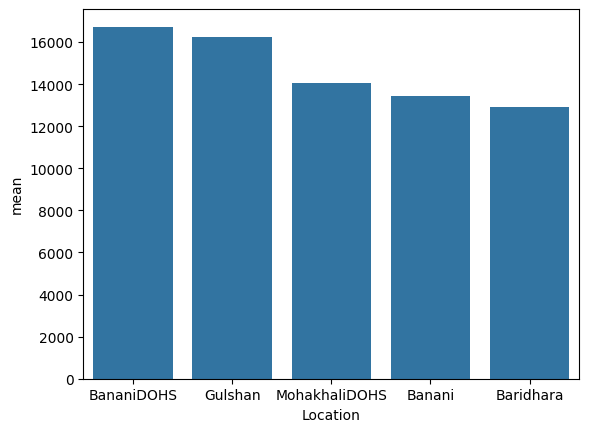

In [ ]:
sns.barplot(data = top5, x = 'Location', y = 'mean')

In [ ]:
least5 = info.groupby('Location')['Price_Per_sqf'].agg(['mean', 'max', 'median', 'min']).sort_values(by='mean', ascending=False).tail(5)
top5

,mean,max,median,min
Location,,,,
BananiDOHS,16729.423974,23200.000000,16666.666667,12013.618677
Gulshan,16234.545194,28571.428571,15421.686747,8928.571429
MohakhaliDOHS,14038.723466,17857.142857,13818.181818,10000.000000
Banani,13421.916821,21428.571429,13095.238095,7985.480944
Baridhara,12923.986831,30000.000000,10091.743119,6675.567423


<Axes: xlabel='Location', ylabel='mean'>

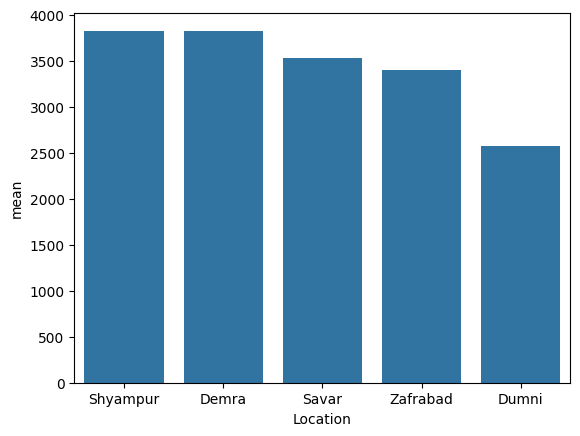

In [ ]:
sns.barplot(data = least5, x = 'Location', y = 'mean')

In [ ]:
df13 = df11.copy()
df13.head(2)

,Price,Type,Size,Bed,Bath,Location,Batch,Price_Per_sqf
0,7500000,Apartment,1300.0,3,3,Uttara,3.0,5769.230769
1,7280000,Apartment,1456.0,4,4,Mirpur,4.0,5000.000000


In [ ]:
location_count = df13.groupby('Location').count()
location_count[location_count<=15]

,Price,Type,Size,Bed,Bath,Batch,Price_Per_sqf
Location,,,,,,,
Adabor,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AftabNagar,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Agargaon,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Badda,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Banani,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
Tejgaon,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Turag,NaN,NaN,NaN,NaN,NaN,11.0,NaN
UttarKhan,NaN,NaN,NaN,NaN,NaN,2.0,NaN


In [ ]:
location_less_than_15 = location_count[location_count<=15]

In [ ]:
df13.Location = df13.Location.apply(lambda x: 'other' if x in location_less_than_15 else x)

In [ ]:
len(df13.Location.unique())

69

In [ ]:
df13.shape

(14871, 8)

In [ ]:
df14 = df13.copy()
df14.head(2)

,Price,Type,Size,Bed,Bath,Location,Batch,Price_Per_sqf
0,7500000,Apartment,1300.0,3,3,Uttara,3.0,5769.230769
1,7280000,Apartment,1456.0,4,4,Mirpur,4.0,5000.000000


In [ ]:
import pandas as pd
import numpy as np

def remove_price_outlier(df):
    df_output = pd.DataFrame()

    for index, subdf in df.groupby('Location'):
        m = np.mean(subdf["Price_Per_sqf"])
        st = np.std(subdf["Price_Per_sqf"])

        # ফিল্টার করার সময় সঠিক বন্ধনী ব্যবহার করতে হবে
        reduce_df = subdf[(subdf["Price_Per_sqf"] >= (m - 2*st)) &
                          (subdf["Price_Per_sqf"] <= (m + 2*st))]

        df_output = pd.concat([df_output, reduce_df], ignore_index=True)

    return df_output

# ফাংশনটি কল করা
df15 = remove_price_outlier(df14)
print(df15.shape)

(14188, 8)


In [ ]:
print(df14.Price_Per_sqf.describe())
print(df15.Price_Per_sqf.describe())

count    14871.000000
mean      6280.980058
std       2639.193766
min        416.666667
25%       4615.384615
50%       5581.947743
75%       7087.503753
max      30000.000000
Name: Price_Per_sqf, dtype: float64
count    14188.000000
mean      6102.034851
std       2377.442865
min       1781.376518
25%       4591.836735
50%       5500.366300
75%       6934.782609
max      23809.523810
Name: Price_Per_sqf, dtype: float64


In [ ]:
df15[df15.Location == 'Mohammadpur'].Price_Per_sqf
df15

,Price,Type,Size,Bed,Bath,Location,Batch,Price_Per_sqf
0,3800000,Apartment,850.0,2,2,Adabor,2.0,4470.588235
1,3500000,Apartment,750.0,2,2,Adabor,2.0,4666.666667
2,3500000,Apartment,750.0,2,2,Adabor,2.0,4666.666667
3,3800000,Apartment,850.0,2,2,Adabor,2.0,4470.588235
4,6700000,Apartment,1115.0,3,3,Adabor,3.0,6008.968610
...,...,...,...,...,...,...,...,...
14183,11500000,Apartment,1550.0,3,3,Uttara,NaN,7419.354839
14184,6000000,Apartment,900.0,2,2,Uttara,NaN,6666.666667
14185,4000000,Apartment,1225.0,3,3,Zafrabad,3.0,3265.306122
14186,4000000,Apartment,1225.0,3,3,Zafrabad,3.0,3265.306122


In [ ]:
df15[df15.Location == 'Mohammadpur'].Price_Per_sqf.mean()

,Price,Type,Size,Bed,Bath,Location,Batch,Price_Per_sqf
0,3800000,Apartment,850.0,2,2,Adabor,2.0,4470.588235
1,3500000,Apartment,750.0,2,2,Adabor,2.0,4666.666667
2,3500000,Apartment,750.0,2,2,Adabor,2.0,4666.666667
3,3800000,Apartment,850.0,2,2,Adabor,2.0,4470.588235
4,6700000,Apartment,1115.0,3,3,Adabor,3.0,6008.968610
...,...,...,...,...,...,...,...,...
14183,11500000,Apartment,1550.0,3,3,Uttara,NaN,7419.354839
14184,6000000,Apartment,900.0,2,2,Uttara,NaN,6666.666667
14185,4000000,Apartment,1225.0,3,3,Zafrabad,3.0,3265.306122
14186,4000000,Apartment,1225.0,3,3,Zafrabad,3.0,3265.306122


In [ ]:
df17 = df15.drop(['Type', 'Price_Per_sqf','Batch'], axis = 1)
df17.head(2)

,Price,Size,Bed,Bath,Location
0,3800000,850.0,2,2,Adabor
1,3500000,750.0,2,2,Adabor


In [ ]:
df17.to_csv('Clean_apartment_data', index = False)

In [ ]:
from google.colab import files
files.download('Clean_apartment_data.csv')

FileNotFoundError: Cannot find file: Clean_apartment_data.csv

In [ ]:
df17.to_csv('/content/Clean_apartment_data.csv', index=False)

In [ ]:
from google.colab import files
files.download('/content/Clean_apartment_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
print(os.listdir())  # বর্তমান ডিরেক্টরির সব ফাইল লিস্ট করবে

['.config', 'Dhaka_Apparantment_Price_CLEAN.csv', 'drive', 'Clean_apartment_data', 'sample_data']


In [ ]:
df18 = pd.read_csv('/content/drive/MyDrive/Data Set/ML_Clean_apartment_data.csv')
df18.head(2)

,Price,Size,Bed,Bath,Location
0,3800000,850.0,2,2,Adabor
1,3500000,750.0,2,2,Adabor


In [ ]:
location_dummy = pd.get_dummies(df18.Location).astype(int)
location_dummy.head(2)

,Adabor,AftabNagar,Agargaon,Badda,Banani,BananiDOHS,Banasree,Banglamotors,Bangshal,Baridhara,...,Shiddheswari,Shyamoli,Shyampur,Sutrapur,Taltola,Tejgaon,Turag,UttarKhan,Uttara,Zafrabad
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df19 = pd.concat([df18, location_dummy], axis = 1)
df19.head(1)

,Price,Size,Bed,Bath,Location,Adabor,AftabNagar,Agargaon,Badda,Banani,...,Shiddheswari,Shyamoli,Shyampur,Sutrapur,Taltola,Tejgaon,Turag,UttarKhan,Uttara,Zafrabad
0,3800000,850.0,2,2,Adabor,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df20 = df19.drop(['Location'],axis = 1)
df20.head(1)

,Price,Size,Bed,Bath,Adabor,AftabNagar,Agargaon,Badda,Banani,BananiDOHS,...,Shiddheswari,Shyamoli,Shyampur,Sutrapur,Taltola,Tejgaon,Turag,UttarKhan,Uttara,Zafrabad
0,3800000,850.0,2,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df20.columns

Index(['Price', 'Size', 'Bed', 'Bath', 'Adabor', 'AftabNagar', 'Agargaon',
       'Badda', 'Banani', 'BananiDOHS', 'Banasree', 'Banglamotors', 'Bangshal',
       'Baridhara', 'BaridharaDOHS', 'Bashabo', 'BashundharaR-A', 'Cantonment',
       'DakshinKhan', 'Demra', 'Dhanmondi', 'Dumni', 'Eskaton', 'Gulshan',
       'Hatirpool', 'Hazaribag', 'Ibrahimpur', 'JatraBari', 'JoarSahara',
       'Kachukhet', 'Kafrul', 'Kakrail', 'Kalabagan', 'Kalachandpur',
       'Kathalbagan', 'Keraniganj', 'Khilgaon', 'Khilkhet', 'Kotwali', 'Kuril',
       'Lalbagh', 'Lalmatia', 'Maghbazar', 'Malibagh', 'Maniknagar', 'Mirpur',
       'Mohakhali', 'MohakhaliDOHS', 'Mohammadpur', 'Motijheel', 'Mugdapara',
       'Nadda', 'NewMarket', 'Niketan', 'Nikunja', 'NorthShahjahanpur',
       'Paribagh', 'Rampura', 'Savar', 'Shahbagh', 'Shahjahanpur',
       'Shantinagar', 'Shegunbagicha', 'Shiddheswari', 'Shyamoli', 'Shyampur',
       'Sutrapur', 'Taltola', 'Tejgaon', 'Turag', 'UttarKhan', 'Uttara',
       'Zafrabad']

In [ ]:
df20.dtypes

,0
Price,int64
Size,float64
Bed,int64
Bath,int64
Adabor,int64
...,...
Tejgaon,int64
Turag,int64
UttarKhan,int64
Uttara,int64


In [ ]:
df20.shape

(14188, 73)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
x = df20.drop(['Price'], axis = 1)
y = df20.Price

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 10)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(11350, 72)
(2838, 72)
(11350,)
(2838,)


In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
model.score(x_test, y_test)

0.8836639209628765

In [115]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [116]:
cv = ShuffleSplit(n_splits = 5, test_size =.2, random_state = 0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.87708685, 0.87841319, 0.87510655, 0.88377188, 0.87826129])

In [ ]:
model.predict()

In [119]:
def predict_price(size, bed,bath,location):
  loc_index = np.where(x.columns == location)[0][0]
  result = np.zeros(len(x.columns))
  result[0] = size
  result[1] = bed
  result[2] = bath
  if loc_index >= 0:
    result[loc_index] = 1
    return model.predict([result])[0]

In [127]:
predict_price(1850,4,4,"Gulshan")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


31174774.135908067

In [118]:
x.head(1)

,Size,Bed,Bath,Adabor,AftabNagar,Agargaon,Badda,Banani,BananiDOHS,Banasree,...,Shiddheswari,Shyamoli,Shyampur,Sutrapur,Taltola,Tejgaon,Turag,UttarKhan,Uttara,Zafrabad
0,850.0,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
